# **Housing Affordability Trends in London: An Inflation-Adjusted Analysis for the Last Two Decades**



In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the datasets
### The datasets containing monthly, yearly and inflation rate

In [4]:
#Load datasets
data_path_monthly = r"C:\Users\sheyi\OneDrive\Documents\python coursework\housing_in_london_monthly_variables.csv"
data_path_yearly = r"C:\Users\sheyi\OneDrive\Documents\python coursework\housing_in_london_yearly_variables.csv"
data_path_inflation = r"C:\Users\sheyi\OneDrive\Documents\python coursework\inflationrate.csv"

monthly_data = pd.read_csv(data_path_monthly)  # Load monthly data
yearly_data = pd.read_csv(data_path_yearly)    # Load yearly data
inflation_data = pd.read_csv(data_path_inflation)  # Load inflation data

## Explore the Datasets and check the datatypes in the datasets 

In [7]:
#Explore Datasets
print("Monthly Data Overview:")
print(monthly_data.info())
print(monthly_data.head())

Monthly Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB
None
         date            area  average_price       code  houses_sold  \
0  1995-01-01  city of london          91449  E09000001         17.0   
1  1995-02-01  city of london          82203  E09000001          7.0   
2  1995-03-01  city of london          79121  E09000001         14.0   
3  1995-04-01  city of london          77101  E09000001          7.0   
4  1995-05-01  city of london          84409

In [9]:
print("\nYearly Data Overview:")
print(yearly_data.info())
print(yearly_data.head())


Yearly Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4   life_satisfaction  352 non-null    float64
 5   mean_salary        1071 non-null   object 
 6   recycling_pct      860 non-null    object 
 7   population_size    1018 non-null   float64
 8   number_of_jobs     931 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       1071 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB
None
        code                  area        date  median_salary  \
0  E09000001        city of london  1999-12-01        33020.0   

In [11]:
print("\nInflation Data Overview:")
print(inflation_data.info())
print(inflation_data.head())


Inflation Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    35 non-null     int64  
 1   Rate    35 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes
None
   Year  Rate
0  1989   5.7
1  1990   8.0
2  1991   7.5
3  1992   4.6
4  1993   2.6


## Select the columns that have been selected to be used for analysis 

In [14]:
#Select relevant columns for analysis
monthly_relevant = monthly_data[['date', 'area', 'average_price', 'borough_flag']]
yearly_relevant = yearly_data[['date', 'area', 'median_salary', 'borough_flag', 'population_size']]

The `borough_flag` == 1 is used to identify boroughs in the dataset 

In [17]:
#Filter for boroughs only (borough_flag = 1)
monthly_boroughs = monthly_relevant[monthly_relevant['borough_flag'] == 1].copy()
yearly_boroughs = yearly_relevant[yearly_relevant['borough_flag'] == 1].copy()

The columns in the inflation dataset will be renamed for consistency across all datasets and also only the years from 1999 to 2019 to match the overlapping years

In [20]:
#Clean Inflation Data
inflation_data = inflation_data.rename(columns={'Year': 'year', 'Rate': 'inflation_rate'})#renaming the columns
inflation_data = inflation_data[(inflation_data['year'] >= 1999) & (inflation_data['year'] <= 2019)]#selecting from  1999 to 2019
inflation_data['cumulative_inflation'] = (1 + inflation_data['inflation_rate'] / 100).cumprod()#cumulative inflation formula

In [22]:
#Check for missing values
print("\nMissing Values in Monthly Boroughs Data:")
print(monthly_boroughs.isnull().sum())

print("\nMissing Values in Yearly Boroughs Data:")
print(yearly_boroughs.isnull().sum())


Missing Values in Monthly Boroughs Data:
date             0
area             0
average_price    0
borough_flag     0
dtype: int64

Missing Values in Yearly Boroughs Data:
date                0
area                0
median_salary      10
borough_flag        0
population_size    33
dtype: int64


In [24]:
#Convert 'date' column to datetime format in monthly and yearly dataset
monthly_boroughs['date'] = pd.to_datetime(monthly_boroughs['date'], errors='coerce')
yearly_boroughs['date'] = pd.to_datetime(yearly_boroughs['date'], errors='coerce')

To ensure proper datetime conversion and handle invalid date entries, `pd.to_datetime()` was used with `errors='coerce'`, replacing invalid dates with `NaT` for clean and reliable analysis.


In [27]:
#Drop rows with invalid dates
monthly_boroughs = monthly_boroughs.dropna(subset=['date']).copy()
yearly_boroughs = yearly_boroughs.dropna(subset=['date']).copy()

In [29]:
#Extract year from the date column
monthly_boroughs['year'] = monthly_boroughs['date'].dt.year
yearly_boroughs['year'] = yearly_boroughs['date'].dt.year

In [31]:
#Filter data between 1999 and 2019 in the monthly and yearly dataset
monthly_boroughs = monthly_boroughs[(monthly_boroughs['year'] >= 1999) & (monthly_boroughs['year'] <= 2019)]
yearly_boroughs = yearly_boroughs[(yearly_boroughs['year'] >= 1999) & (yearly_boroughs['year'] <= 2019)]

In [33]:
#Aggregate monthly average prices into yearly averages for consistency
monthly_aggregated = monthly_boroughs.groupby(['area', 'year'], as_index=False)['average_price'].mean()

In [55]:
#Merge aggregated data with yearly salary and inflation data
yearly_data_filtered = yearly_boroughs[['area', 'year', 'median_salary', 'population_size']]
merged_data = pd.merge(monthly_aggregated, yearly_data_filtered, on=['area', 'year'], how='inner')
merged_data = pd.merge(merged_data, inflation_data[['year', 'cumulative_inflation', 'inflation_rate']], on='year', how='left')

In [78]:
# Handle Missing Values in Median Salary
# Interpolate missing values for median salary

merged_data['median_salary'] = merged_data['median_salary'].interpolate(method='linear', limit_direction='both')

# Handle any remaining missing values (e.g., forward-fill or backward-fill)
merged_data['median_salary'] = merged_data['median_salary'].ffill().bfill()



To handle missing values in `median_salary`, a two-step approach was used:
1. **Linear Interpolation:** Missing values were interpolated linearly across years for each borough. This fills gaps between available data points.
2. **Edge Cases:** For boroughs with missing values at the start or end of the dataset, remaining gaps were filled using forward-fill and backward-fill methods.
This ensures a complete and consistent dataset for analysis.


In [81]:
#Adjust average_price and median_salary for inflation
merged_data['adjusted_price'] = merged_data['average_price'] / merged_data['cumulative_inflation']
merged_data['adjusted_salary'] = merged_data['median_salary'] / merged_data['cumulative_inflation']
merged_data['adjusted_price_to_income_ratio'] = merged_data['adjusted_price'] / merged_data['adjusted_salary']
#Round values for readability
merged_data = merged_data.round(0)

Missing values in the `median_salary` column were addressed using linear interpolation, which estimates missing values based on a straight-line trend between existing data points, ensuring data continuity and preserving trends.


In [84]:
#Save the merged dataset to a CSV file
output_path = r"C:\Users\sheyi\OneDrive\Documents\python coursework\merged_dataset.csv"
merged_data.to_csv(output_path, index=False)
print(f"Merged dataset saved to {output_path}")

Merged dataset saved to C:\Users\sheyi\OneDrive\Documents\python coursework\merged_dataset.csv


# Line Chart for Annual Inflation rate from 1999 to 2019 

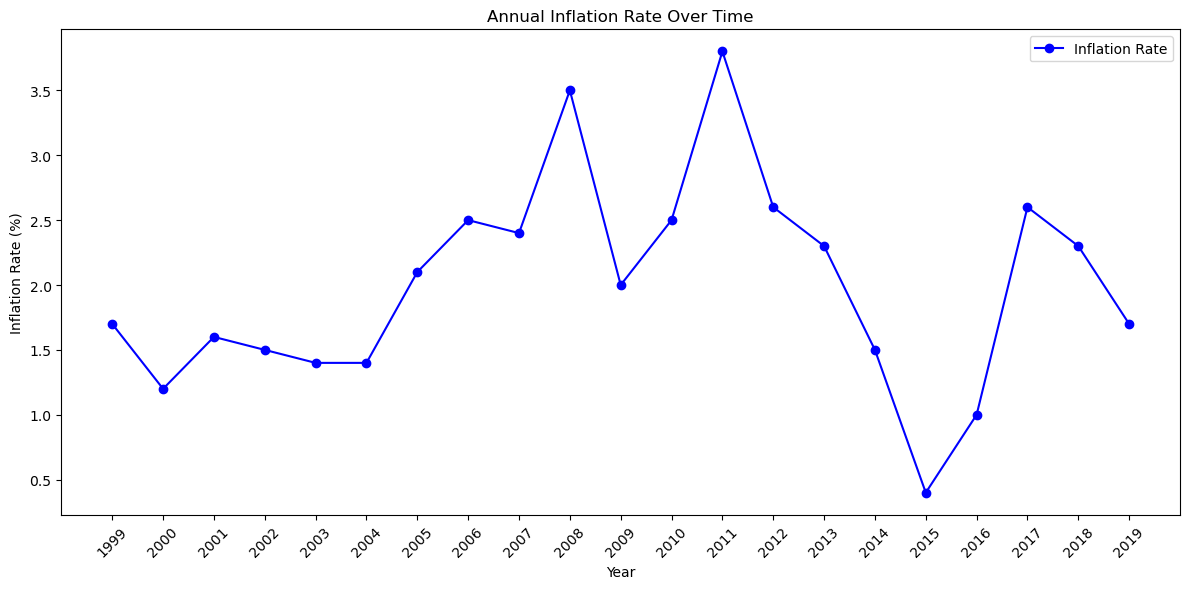

In [87]:
# Visualize Inflation Rate Over Time
plt.figure(figsize=(12, 6))
plt.plot(inflation_data['year'], inflation_data['inflation_rate'], marker='o', label='Inflation Rate', color='blue')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Annual Inflation Rate Over Time')
plt.xticks(range(1999, 2020), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Annual Inflation Rate Over Time (1999-2019)

This line chart visualizes the annual inflation rate from 1999 to 2019. Key observations include:

- **Fluctuations in Inflation**: The inflation rate shows significant variability over the years, with peaks observed in 2008 and 2017. 
- **Economic Trends**: The dip in inflation around 2015 corresponds to global economic trends during that period.
- **Context for Analysis**: Understanding inflation trends is critical for adjusting housing prices and salaries to reflect real values, ensuring accurate analysis of affordability.

This visualisation underscores the importance of inflation adjustments in evaluating economic changes over time.


# Line Chart for Original vs Inflation-Adjusted Prices

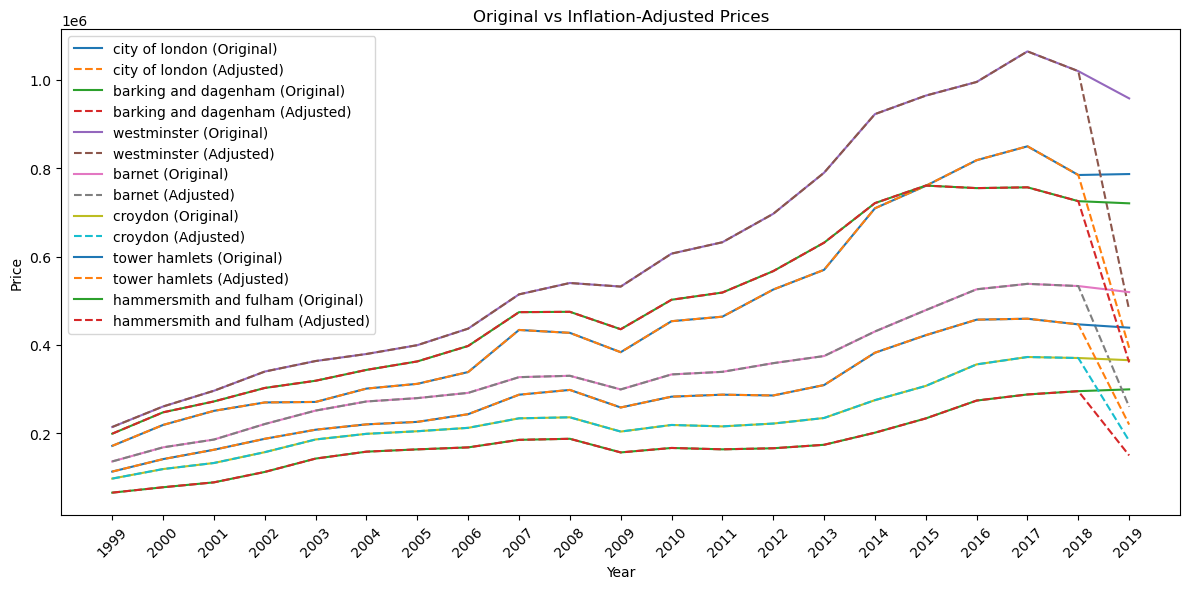

In [91]:
#Compare Original vs Adjusted Prices for Selected Boroughs
selected_boroughs = ['city of london', 'barking and dagenham', 'westminster', 'barnet', 'croydon', 'tower hamlets', 'hammersmith and fulham']
plt.figure(figsize=(12, 6))
for borough in selected_boroughs:
    borough_data = merged_data[merged_data['area'] == borough]
    plt.plot(borough_data['year'], borough_data['average_price'], label=f'{borough} (Original)')
    plt.plot(borough_data['year'], borough_data['adjusted_price'], linestyle='--', label=f'{borough} (Adjusted)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Original vs Inflation-Adjusted Prices')
plt.legend()
plt.xticks(range(1999, 2020), rotation=45)
plt.tight_layout()
plt.show()

### Original vs Inflation-Adjusted Prices for Selected Boroughs (1999-2019)

This line chart compares the nominal (original) and inflation-adjusted housing prices for selected London boroughs from 1999 to 2019. Key insights include:

- **Impact of Inflation**: Inflation-adjusted prices (dashed lines) are consistently lower than nominal prices (solid lines), reflecting the diminishing purchasing power of money over time.
- **Borough Disparities**: Central boroughs like Westminster and the City of London show steep price increases, highlighting their high demand and premium status. In contrast, outer boroughs such as Barking and Dagenham demonstrate more moderate price growth.
- **Realistic Growth Assessment**: Adjusted prices present a more accurate picture of affordability by showing less dramatic growth compared to nominal prices.

Thissvisualization highlights the importance of inflation adjustments in understanding real housing affordability and regional disparities in price trends.


# Heatmap of Adjusted Price to Income Ratios(1999-2019)

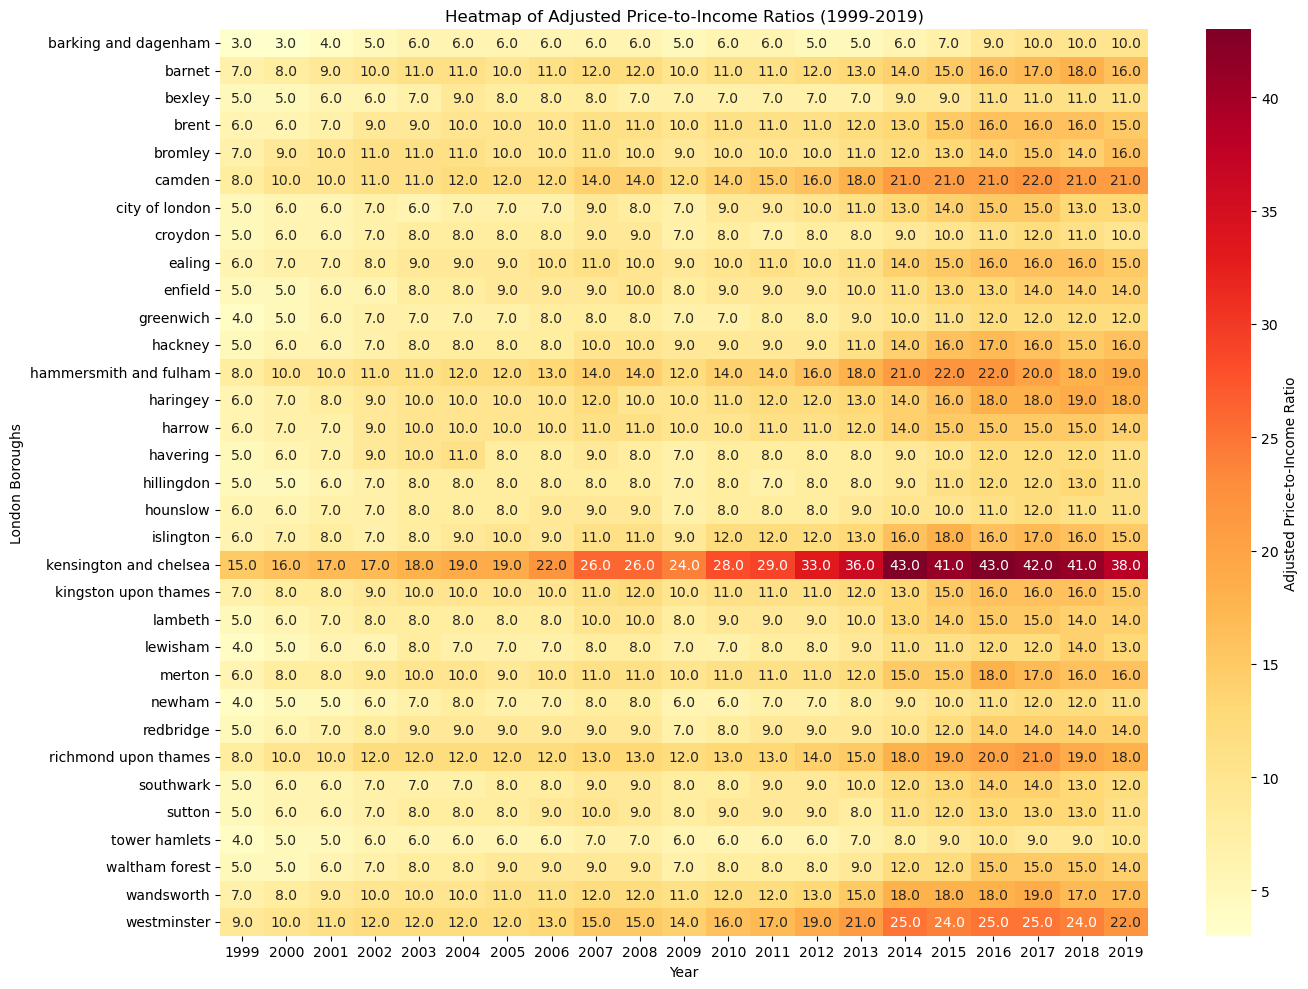

In [95]:
#Heatmap of Adjusted Price-to-Income Ratios
plt.figure(figsize=(14, 10))
pivot_data = merged_data.pivot_table(index='area', columns='year', values='adjusted_price_to_income_ratio')
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.1f', cbar_kws={'label': 'Adjusted Price-to-Income Ratio'})
plt.title('Heatmap of Adjusted Price-to-Income Ratios (1999-2019)')
plt.xlabel('Year')
plt.ylabel('London Boroughs')
plt.tight_layout()
# Save the heatmap as an image
plt.savefig('heatmap_price_to_income.png', dpi=300)
plt.show()

## Insights from the Heatmap of Adjusted Price-to-Income Ratios (1999-2019)

The heatmap provides a clear, borough-level view of housing affordability trends over the years, measured using the **Adjusted Price-to-Income Ratio**. Key insights include:

### 1. **Least Affordable Boroughs**:
   - **Kensington and Chelsea** consistently had the **highest adjusted price-to-income ratios** throughout the years, with ratios exceeding 40 in the later years (2014-2019).  
     This indicates severe affordability pressures in this borough.

   - **Westminster** and **Hammersmith and Fulham** also show consistently high ratios, making them among the least affordable areas in London.

---

### 2. **More Affordable Boroughs**:
   - **Barking and Dagenham**, **Croydon**, and **Tower Hamlets** have consistently lower price-to-income ratios, particularly at the beginning of the observed period (1999-2005).
   - These boroughs have remained relatively affordable compared to central boroughs like Westminster.

---

### 3. **General Trends**:
   - **Steady Increase**: Across most boroughs, the adjusted price-to-income ratios **increased steadily over time**, reflecting worsening affordability from 1999 to 2019.
   - A significant rise is observed after **2009**, which could be linked to economic recovery following the financial crisis.
   - **2014-2019**: Ratios peak in many boroughs, suggesting accelerated housing price increases relative to adjusted salaries.

---

### 4. **Patterns Across Boroughs**:
   - Central London boroughs (e.g., **Westminster**, **Kensington and Chelsea**) exhibit the **highest ratios**, highlighting the affordability gap in prime real estate locations.
   - Outer boroughs (e.g., **Barking and Dagenham**, **Redbridge**) remain more affordable but still experience an upward trend over time.

---

### Key Takeaways:
The heatmap highlights growing housing affordability issues across London boroughs:
- Central boroughs are becoming increasingly unaffordable.
- Even traditionally affordable boroughs show upward trends, indicating affordability challenges throughout Greater London.
- Policymakers and stakeholders can use this data to identify areas needing intervention or housing development initiatives.

## Summary

This analysis explores housing affordability trends across London boroughs over the last two decades (1999–2019), using inflation-adjusted price-to-income ratios as a key measure. By leveraging datasets on housing prices, median salaries, and inflation rates, the study provides insights into how affordability has evolved over time. The findings reveal widening disparities between central and outer boroughs, highlight the significant impact of inflation adjustments, and emphasize the growing housing affordability challenges faced by London residents. This research underscores the importance of accounting for inflation to present a more accurate picture of housing market dynamics.
